# Exercise 01: Two Important Fourier Pairs

In this exercise,
you will get familiar
with two extremely important Fourier transform pairs:
\begin{align*}
    \text{impulse train} &\Longleftrightarrow \text{impulse train}\\
    \text{rectangle} &\Longleftrightarrow \text{sinc function}
\end{align*}

Let's install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn numpy matplotlib ipywidgets ipympl

and import some modules:

In [2]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt

As usual, you might want to run this command occassionally to clear up the memory from the widgets:

In [3]:
plt.close('all')

The code below creates some plot widgets:

IntSlider(value=1, description='k', max=6, min=1)

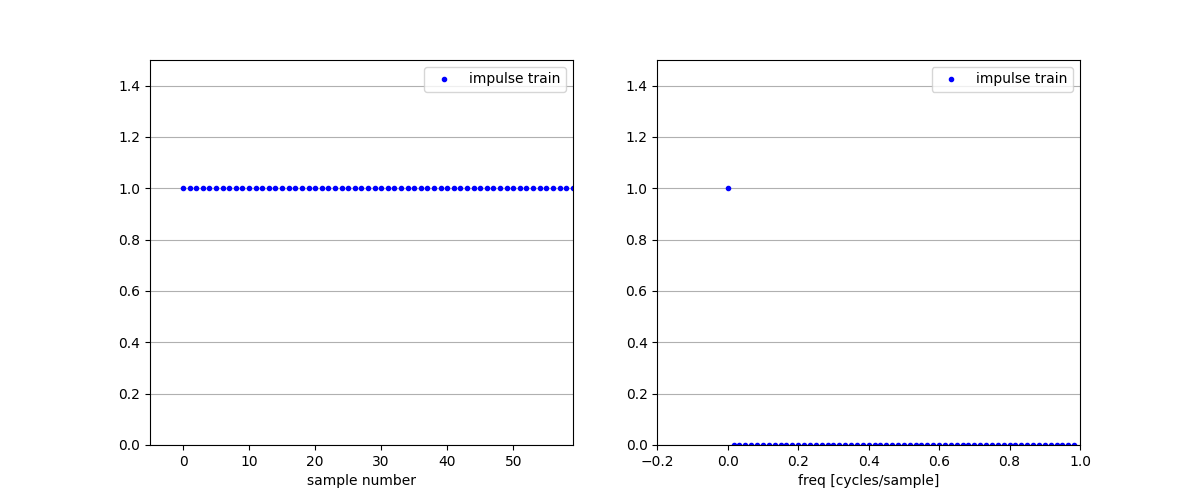

In [4]:
def create_impulse_train_plot():
    
    def generate_data (spacing__samp):
        res = sklearn.utils.Bunch()
        
        res.spacing__samp = spacing__samp
        res.N_samps       = 60

        res.impulses_t = np.zeros( (1, res.N_samps) )
        res.impulses_t[0, ::res.spacing__samp] = 1

        res.sample_numbers = np.linspace(0, res.N_samps-1, res.N_samps).reshape(1, res.N_samps);
        
        res.N_fft = res.N_samps
            
        res.impulses_f = res.spacing__samp*np.abs(np.fft.fft(res.impulses_t, res.N_fft))/res.N_fft

        res.freq_numbers = np.linspace(0, res.N_samps-1, res.N_samps).reshape(1, res.N_samps)/res.N_samps;
        
        return res

    slider_spacing__samp = widgets.IntSlider(min=1, max=6, step=1, value= 1, description="k", continuous_update=True)

    fig = plt.figure(figsize=(12,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax_t = fig.add_subplot(1, 2, 1)
    ax_f = fig.add_subplot(1, 2, 2)

    def update_lines(dummy):
        res = generate_data(slider_spacing__samp.value)
        
        ax_t.clear()
        ax_f.clear()

        ax_t.set_xlim(-5, res.N_fft-1)
        ax_t.set_ylim(0, +1.5)
        plt.sca(ax_t)
        plt.xlabel(r'sample number')
        plt.grid(visible=True, which='major', axis='y')

        line_impulse_t, = ax_t.plot(np.transpose(res.sample_numbers), np.transpose(res.impulses_t), color='b', marker='.', linewidth=0.0)
        ax_t.legend([line_impulse_t], ['impulse train'])
    
        line_impulse_f, = ax_f.plot(np.transpose(res.freq_numbers), np.transpose(res.impulses_f), color='b', marker='.', linewidth=0.0)
        ax_f.set_xlim(-0.2, 1.0)
        ax_f.set_ylim(0, +1.5)
        plt.sca(ax_f)
        plt.xlabel(r'freq [cycles/sample]')
        plt.grid(visible=True, which='major', axis='y')
        ax_f.legend([line_impulse_f], ['impulse train'])

        fig.canvas.draw_idle()

    update_lines('dummy')
        
    slider_spacing__samp.observe(update_lines, names='value')
    
    display(slider_spacing__samp)
    
create_impulse_train_plot()

The left plot (the "time" or "sample" domain)
shows an impulse train
with every $k^{th}$ sample set to 1.

The right plot (the "frequency" domain)
shows the Fourier transform
of the samples on the left.
The x-axis is in the "normalized"
units of cycles/sample.

**Does increasing $k$ increase or decrease the frequency of pulses in the train on the left plot?**

Increasing k decreases the frequency of the pulses in the train on the left plot.

Set $k = 5$.

**How far apart are the pulses in the train on the right plot?**

The pulses on the right are 0.2 cycles/sample apart.

Adjust $k$ and inspect the spacing of the pulses in the frequency domain.

**Come up with a formula for the frequency domain spacing in terms of the time domain spacing.**

for period T in the time domain, frequency domain spacing is 1/T

The following code creates another plot widget:

IntSlider(value=5, description='w', max=30, min=1)

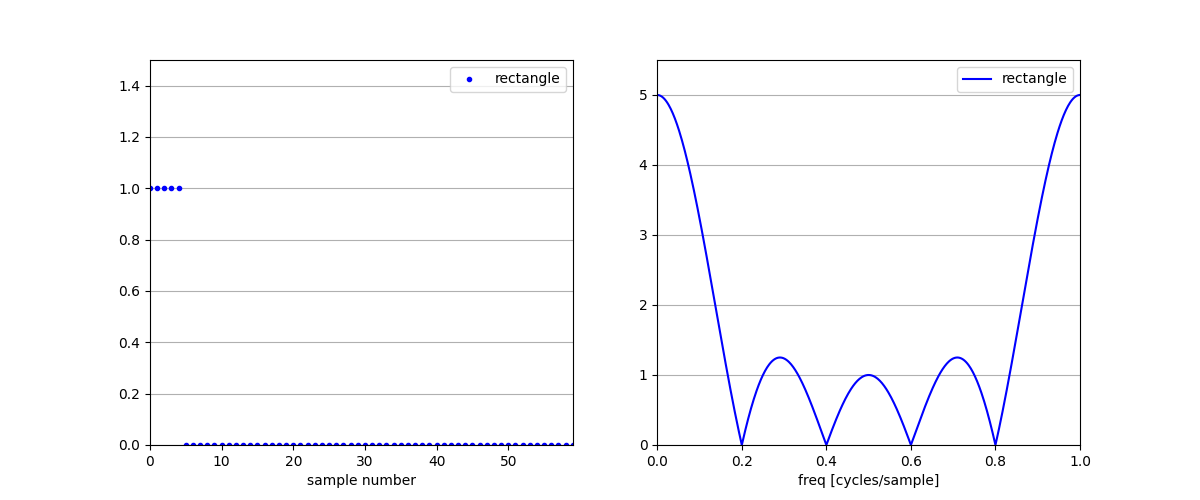

In [5]:
def create_rect_plot():
    
    def generate_data (width__samp):
        res = sklearn.utils.Bunch()
        
        res.width__samp = width__samp
        res.N_samps     = 60

        res.impulses_t = np.zeros( (1, res.N_samps) )
        res.impulses_t[0, 0:res.width__samp] = 1.0

        res.sample_numbers = np.linspace(0, res.N_samps-1, res.N_samps).reshape(1, res.N_samps);
        
        res.N_fft = 10*res.N_samps

        res.impulses_t_buf = np.zeros((1,res.N_fft));
        res.impulses_t_buf[0,0:res.impulses_t.size] = res.impulses_t
        
        res.impulses_f = np.abs(sp.fft.fft(res.impulses_t_buf, res.N_fft)).reshape(1, res.N_fft)

        res.freq_numbers = np.linspace(0, res.N_fft-1, res.N_fft).reshape(1, res.N_fft)/res.N_fft;
        
        return res

    slider_width__samp = widgets.IntSlider(min=1, max=30, step=1, value=5, description="w", continuous_update=True)

    fig = plt.figure(figsize=(12,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax_t = fig.add_subplot(1, 2, 1)
    ax_f = fig.add_subplot(1, 2, 2)

    def update_lines(dummy):
        res = generate_data(slider_width__samp.value)
        
        ax_t.clear()
        ax_f.clear()

        ax_t.set_xlim(0, res.N_samps-1)
        ax_t.set_ylim(0, +1.5) #/res.width__samp)
        plt.sca(ax_t)
        plt.xlabel(r'sample number')
        plt.grid(visible=True, which='major', axis='y')

        line_rect_t, = ax_t.plot(np.transpose(res.sample_numbers), np.transpose(res.impulses_t), color='b', marker='.', linewidth=0.0)
        ax_t.legend([line_rect_t], ['rectangle'])
    
        line_rect_f, = ax_f.plot(np.transpose(res.freq_numbers), np.transpose(res.impulses_f), '-b')
        ax_f.set_xlim(0, 1.0)
        ax_f.set_ylim(0, 1.1*res.width__samp)
        plt.sca(ax_f)
        plt.xlabel(r'freq [cycles/sample]')
        plt.grid(visible=True, which='major', axis='y')
        ax_f.legend([line_rect_f], ['rectangle'])

        fig.canvas.draw_idle()

    update_lines('dummy')
        
    slider_width__samp.observe(update_lines, names='value')
    
    display(slider_width__samp)
    
create_rect_plot()

The left plot shows a rectangle with width $w$.

The right plot shows the Fourier transform of the waveform on the left.

While adjusting $w$,
note the position of the first null
(where the graph touches $y=0$)
on the right.

**Write a formula for the frequency of the first null in terms of $w$.**

$\frac{1}{\omega}$

Set $w=5$.

Recall that the Fourier transform coefficient describes the correlation of a complex exponential with the input waveform.

**In terms of the complex unit circle, explain why the frequencies 0.2, 0.4, 0.6, and 0.8 cycles/sample are nulls, while every other frequency is not.**

A rectangular pulse with period w in the time domain multiplied by a sinusoidal wave with period 1/w equals 0.